In [1]:
#import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#we want our plots to appear inside the notebool
%matplotlib inline
#models form scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type 
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* can range from mild symptoms to severe problems
* signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data exploration(exploratory data analysis or EDA)


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

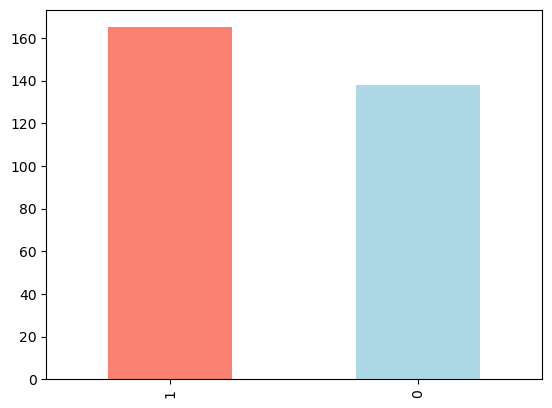

In [6]:
df['target'].value_counts().plot(kind='bar' ,color = ('salmon','lightblue'));

In [7]:
#are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
#according to above data a women is indicated with 0 and men is indicated with 1
# target 1 means having heart disease and target 0 means not having heart disease

#according to data if a person is women then there is nearly 75% chance she is having heart disease while men have nearly 50% 

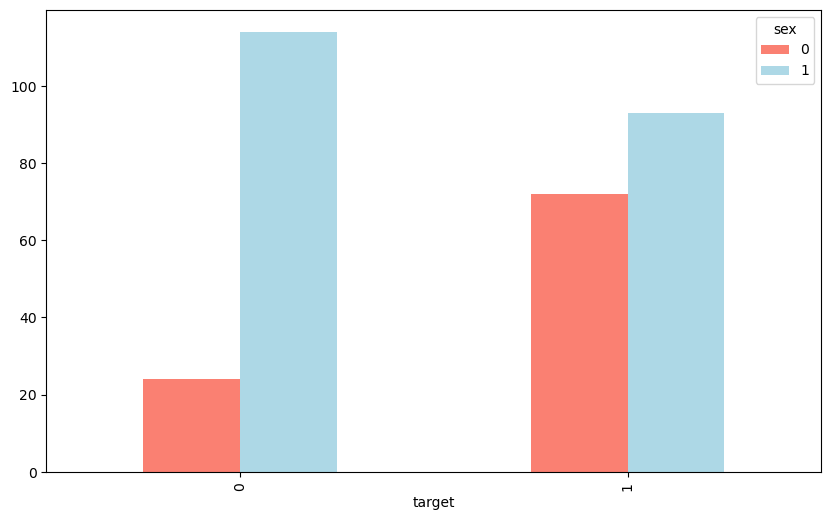

In [12]:
 #create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize = (10,6),color =['salmon','lightblue']);


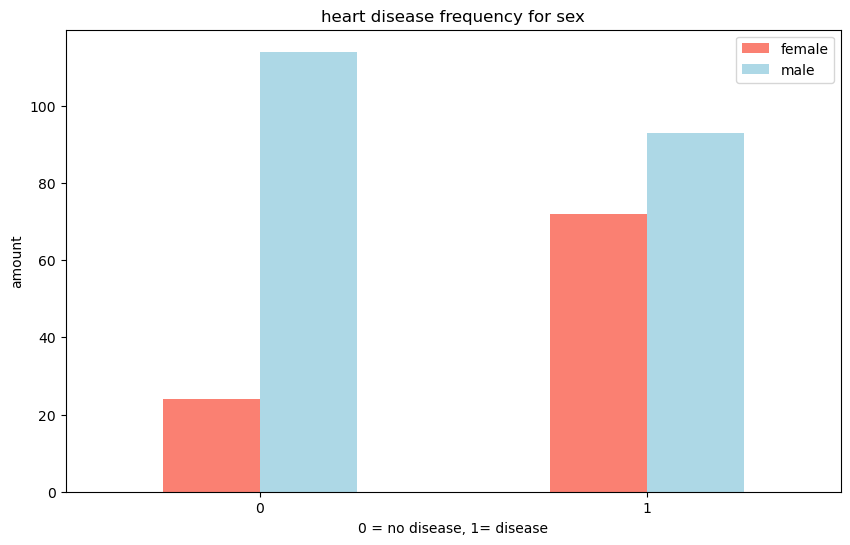

In [13]:
pd.crosstab(df.target,df.sex).plot(kind = 'bar',figsize=(10,6),color = ['salmon','lightblue'])
plt.title('heart disease frequency for sex')
plt.xlabel('0 = no disease, 1= disease')
plt.ylabel('amount')
plt.legend(['female','male']);
plt.xticks(rotation=0);


## age vs max heart rate for heart disease


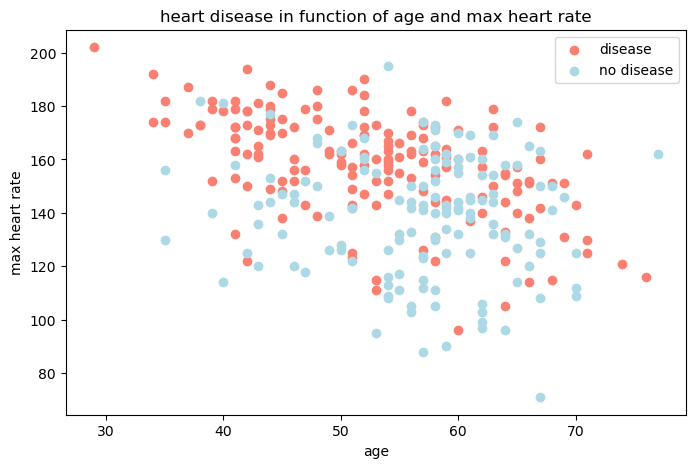

In [14]:
plt.figure(figsize=(8,5))
#scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color = 'salmon')

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color = 'lightblue')

plt.title('heart disease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['disease','no disease']);


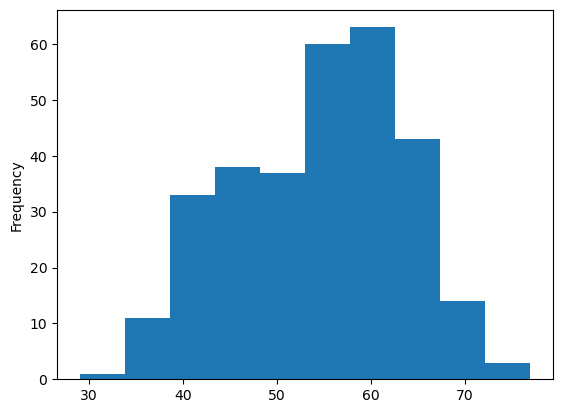

In [15]:
df.age.plot.hist();

## heart disease frequency per chest pain type

cp = chest pain type

**0: typical angina:chest pain related decrease blood sypply to the heart**

**1:atypical angina:chest pain not related to heart**

**2:non-anginal pain:typically esophaegeal spasms(non heart related)**

**3:asymptomatic:chest pain not showing signs of disease**

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


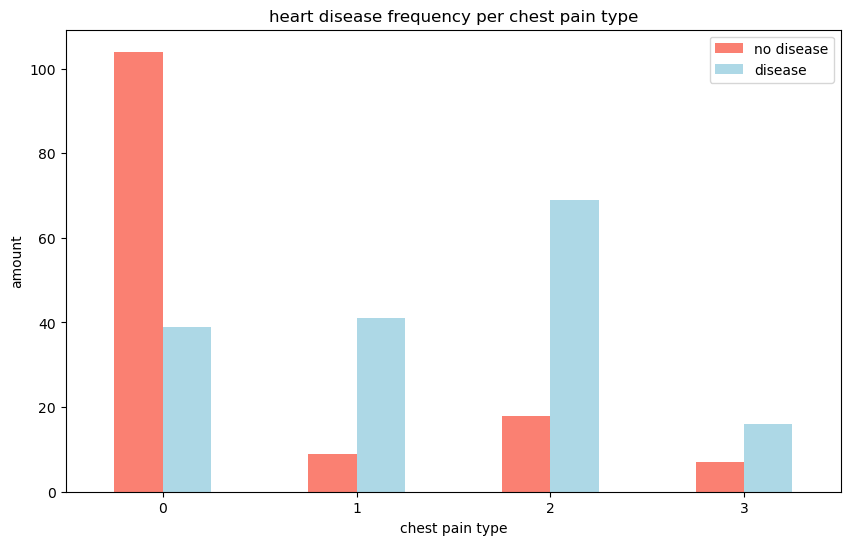

In [17]:
# make the crosstabl more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['no disease','disease'])
plt.xticks(rotation=0);

In [18]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


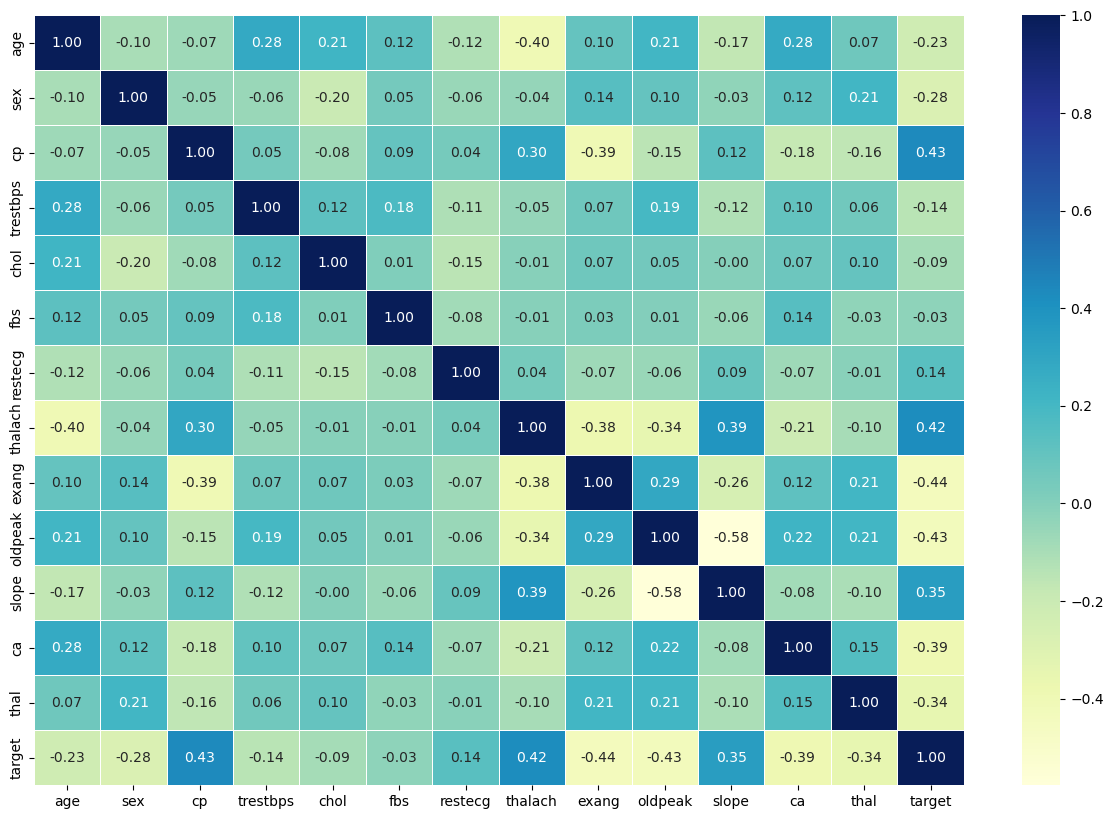

In [19]:
#lets make correlation matrix prettier using seaborn heatmap
import seaborn as sns
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = '0.2f',
                 cmap = 'YlGnBu'
                )


In [20]:
x = df.drop('target',axis =1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)


In [23]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

# we will try 3 classification classifier
1.logistic regression

2.k-neighbours classifier

3.random forest classifier


In [25]:
#put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {'logistic regression':LogisticRegression(),
           'KNN':KNeighborsClassifier(),
            'Random Forest':RandomForestClassifier()}
#create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        # evaluate the model and append its score to model
        model_scores[name] = model.score(x_test,y_test)
    return model_scores


In [26]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores


C:\Users\Asus\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

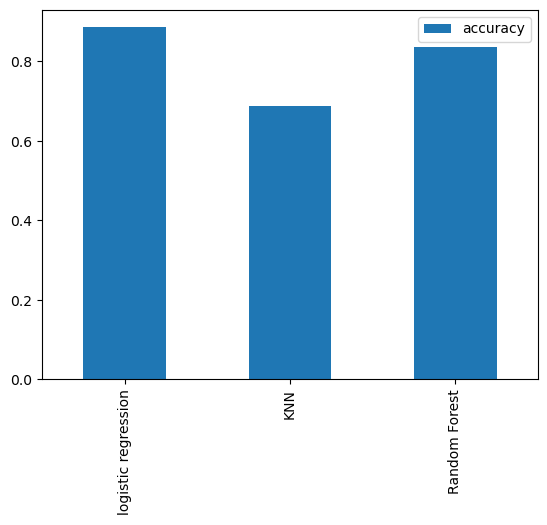

In [27]:
model_compare = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare.T.plot.bar();

## let's look at the following
* hyperparameter tuning
* feature importance
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* roc curve 
* area under the curve(AUC)


# TUNING MODELS

In [28]:
#let's tune KNN
train_scores = []
test_scores = []
#create a list of different values for n_neighbors
neighbors = range(1,21)
knn = KNeighborsClassifier()
#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train,y_train)
    
    #update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #update the test scores list
    test_scores.append(knn.score(x_test,y_test))
    

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

the maximum KNN score on the test data:75.41


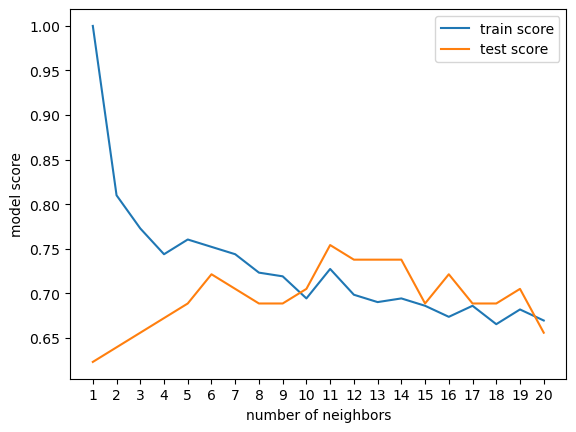

In [31]:
plt.plot(neighbors,train_scores,label = 'train score')
plt.plot(neighbors,test_scores,label = 'test score')
plt.xlabel('number of neighbors')
plt.ylabel('model score')
plt.legend()
#this will arange values from 1 to 21
plt.xticks(np.arange(1,21));
print(f'the maximum KNN score on the test data:{max(test_scores)*100:.2f}')

## hyperparameter tuning with RandomizedSearchCV

* logisticRegression()
* RandomForestClassifier()


In [32]:
#create a hyperparamter grid for logisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}
#create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
            'min_samples_split':np.arange(2,20,2),
            'min_samples_leaf':np.arange(1,20,2)}

In [33]:
# tune LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True
                               )
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [36]:
# now tune logisticRegression
np.random.seed(42)
#setup random hyperparameter search for RandomForestClassifier
rs_rf =RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose = True)
#fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
#find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [39]:
model_scores

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## hyperparameter tuning with GridSearchCV

since our logisticRegression(it is a classifier)model provides the best score
now tune the model using GridSearchCV

In [40]:
#different hyperparameters for our logisticRegression model
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver':['liblinear']}
#setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv =5,
                          verbose =True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
#evaluate grid search 
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## evaluating our tuned machine learning classifier,beyond accuracy
* ROC curve and AUC score
* confusion matrix
* classification report
* precision
* recall
* f1-score

In [43]:
#make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\Asus\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


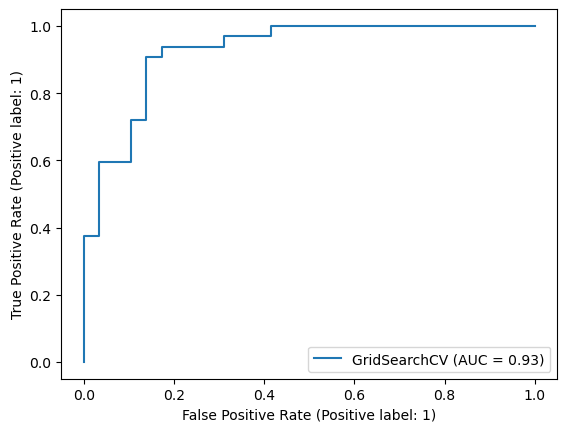

In [45]:
#plot roc curve and calculate roc and AUC metrics
plot_roc_curve(gs_log_reg,x_test,y_test)

In [46]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


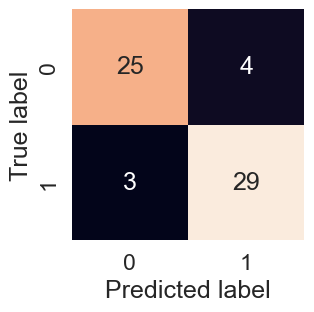

In [47]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
plot_conf_mat(y_test,y_preds)

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calculate evaluation metrics using cross-validation

In [51]:
#check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
#create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,solver ='liblinear')

In [57]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring = 'accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [59]:
#cross validated precision
cv_precision = cross_val_score(clf,x,y,cv=5,scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [60]:
#cross validated recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring ='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [61]:
#cross validated f1-score
cv_f1_score = cross_val_score(clf,x,y,cv=5,scoring = 'f1')
cv_f1_score  = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

<AxesSubplot:title={'center':'cross-validated classifier metrics'}>

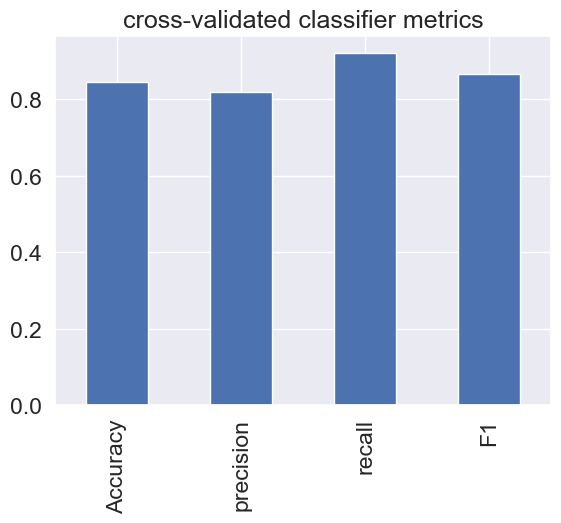

In [64]:
#visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy':cv_acc,
    'precision':cv_precision,
    'recall':cv_recall,
    'F1':cv_f1_score
},index=[0])
cv_metrics.T.plot.bar(title ='cross-validated classifier metrics',legend = False)

## feature importance
feature importance is another as asking'which features contributed most to the outcomes of the model and how did they contribute?'


In [65]:
# fit an instance of logisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
clf = LogisticRegression(C = 0.20433597178569418,solver = 'liblinear')
clf.fit(x_train,y_train);

In [70]:
#check coef_ : it is used to check how dependent feature contribute to the target features
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

<AxesSubplot:title={'center':'feature importance'}>

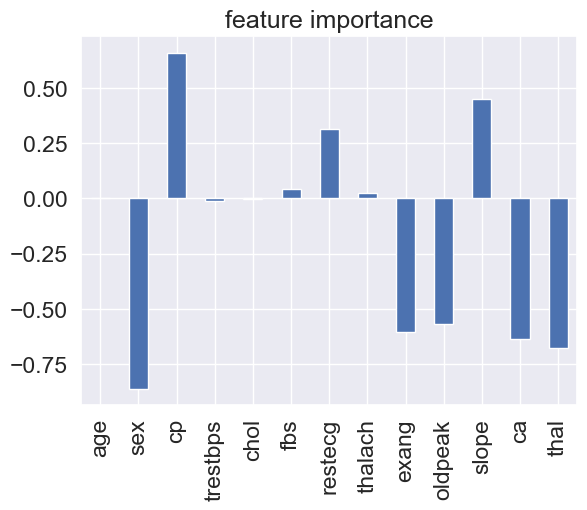

In [73]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = 'feature importance',legend = False)

In [74]:
pd.crosstab(df['sex'],df['target'])


target,0,1
sex,,
0,24,72
1,114,93


In [75]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
